# DSCI 503 - Project 02

### Seif Kungulio

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import math

## Part A: Stock Simulation Function

In this section, we will create and test a function to generate sequences of simulated daily stock prices. This function will use parameters for the starting price, expected annual yield rate, annual volatility, and the number of days to simulate. The purpose of this function is to simulate the behavior of stock prices over time, based on given parameters, using a probabilistic mode.


In [2]:
def simulate_stock(start, rate, vol, days):
    # Generate daily yields
    daily_yields = np.random.normal(loc=rate/252, scale=vol/(252**0.5), size=days)
    
    # Calculate cumulative yields
    cumulative_yields = np.cumsum(daily_yields)
    
    # Create daily multipliers
    daily_multipliers = np.exp(cumulative_yields)
    
    # Calculate simulated daily prices
    simulated_prices = np.round(start * daily_multipliers, 2)
    
    # Add the starting price to the beginning of the array
    simulated_prices = np.concatenate(([start], simulated_prices))
    
    return simulated_prices


We are about to test the **simulate_stock** function with the following parameters:
- Current price: 500
- Expected annual return: 8%
- Annual volatility: 0.3
- Number of days to simulate: 60

The results will be displayed in a line plot. Running this cell multiple times will show the variation in simulated results. To ensure reproducibility, we will set the random seed to 1.


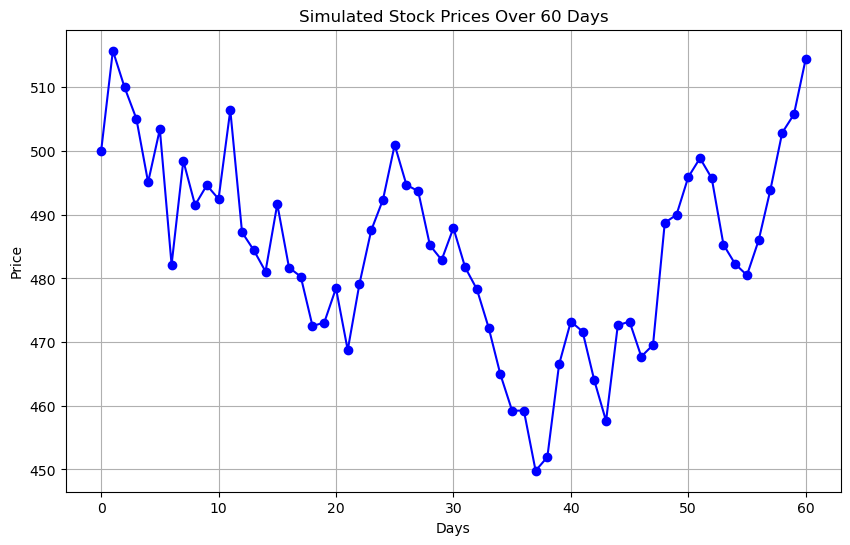

Final simulated price: 514.44


In [3]:
# Set the random seed for reproducibility
np.random.seed(1)

# Test the function
start_price = 500
annual_return = 0.08
annual_volatility = 0.3
days_to_simulate = 60

simulated_prices = simulate_stock(start=start_price, rate=annual_return, vol=annual_volatility, days=days_to_simulate)

# Plot the simulated stock prices
plt.figure(figsize=(10, 6))
plt.plot(simulated_prices, marker='o', linestyle='-', color='b')
plt.title('Simulated Stock Prices Over 60 Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Print the final price for verification
print(f"Final simulated price: {simulated_prices[-1]}")


## Part B: Annual Yield Function

In this part, we will create and test a function that calculates the annual yield of a stock based on a simulated run of its daily prices. The purpose is to analyze the performance of a stock over a simulated period and understand the variability in annual yields through multiple simulations.


In [4]:
def find_yield(run):
    initial_price = run[0]
    final_price = run[-1]
    days_in_run = len(run) - 1
    annual_yield = math.log(final_price / initial_price) * (252 / days_in_run)
    return round(annual_yield, 4)

We will now test the **find_yield** function using the simulated run from Part A.


In [5]:
# Testing find_yield() function on the previously simulated run
print("Annual Yield for the simulated run:", find_yield(simulated_prices))

Annual Yield for the simulated run: 0.1196


Now, we will explore the potential variability in our simulated runs by creating and plotting 25 simulated runs.

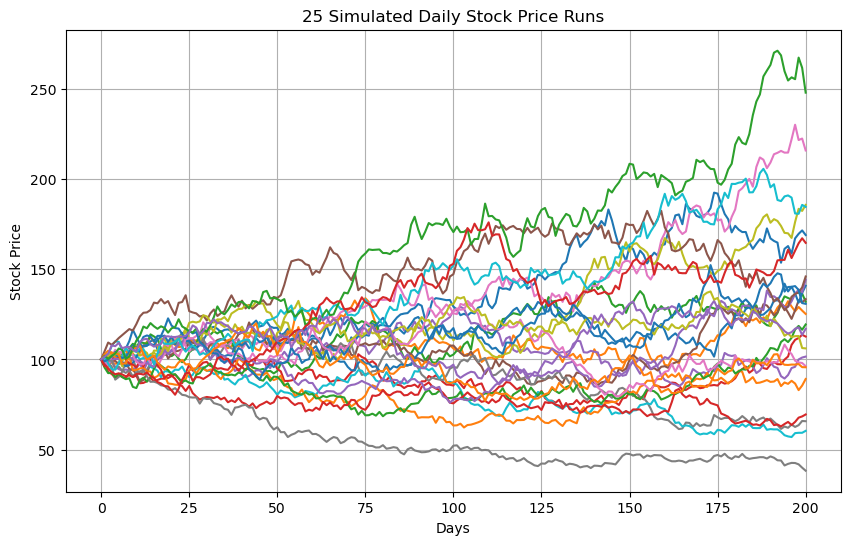

In [6]:
# Initialize an empty list to store annual yields
annual_yield_list = []

# Create a figure to plot all 25 runs
plt.figure(figsize=(10, 6))

# Loop to simulate 25 runs and plot them
for i in range(25):
    # Simulating a run
    run = simulate_stock(start=100, rate=0.06, vol=0.4, days=200)

    # Calculating annual yield for the run
    annual_yield = find_yield(run)

    # Storing the annual yield in the list
    annual_yield_list.append(annual_yield)

    # Plotting the run
    plt.plot(run)

plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('25 Simulated Daily Stock Price Runs')
plt.grid(True)
plt.show()

The following cell will display the yields for the 25 simulated runs.


In [7]:
# Displaying the list of annual yields for the 25 simulated runs
print("Annual Yields for the 25 Simulated Runs:")
print(annual_yield_list)

Annual Yields for the 25 Simulated Runs:
[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes

In this part, we will experiment with different random seeds to simulate the prices of three stocks over a period of 100 days. Our goal is to find specific seeds that result in a desired outcome: one seed that makes Stock A have the highest final price, another seed for Stock B, and yet another for Stock C.

In the cell below, Stock A has the highest simulated final price.

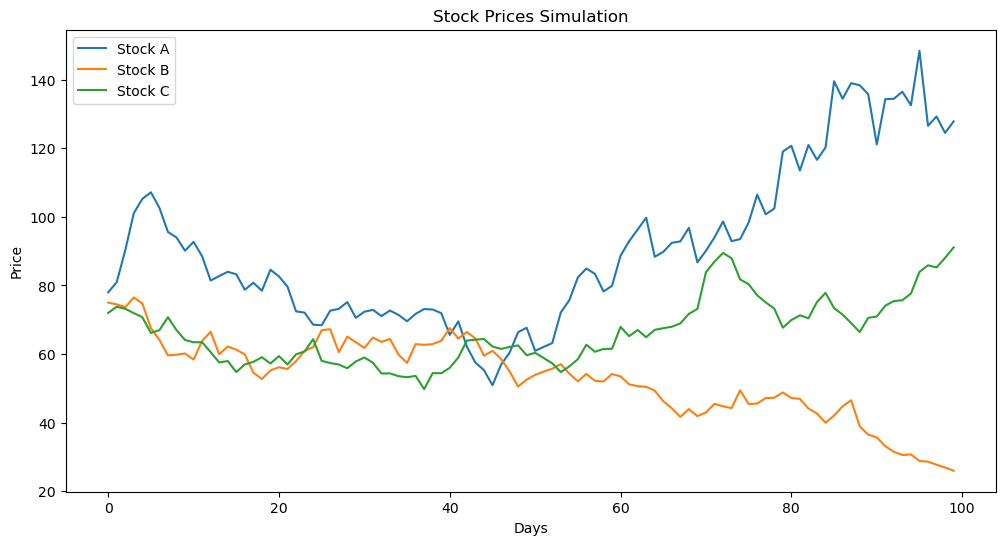

In [8]:
# Set random seed
np.random.seed(42)

# Parameters for the stocks
days = 100

# Stock A
price_A = 78
return_A = 0.04
volatility_A = 1.2

# Stock B
price_B = 75
return_B = 0.08
volatility_B = 0.8

# Stock C
price_C = 72
return_C = 0.16
volatility_C = 0.6

# Simulate stock prices
prices_A = [price_A]
prices_B = [price_B]
prices_C = [price_C]

for _ in range(1, days):
    price_A *= (1 + return_A / 252 + np.random.normal(0, volatility_A / np.sqrt(252)))
    price_B *= (1 + return_B / 252 + np.random.normal(0, volatility_B / np.sqrt(252)))
    price_C *= (1 + return_C / 252 + np.random.normal(0, volatility_C / np.sqrt(252)))
    prices_A.append(price_A)
    prices_B.append(price_B)
    prices_C.append(price_C)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(prices_A, label='Stock A')
plt.plot(prices_B, label='Stock B')
plt.plot(prices_C, label='Stock C')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.title('Stock Prices Simulation')
plt.show()

In the cell below, Stock B has the highest simulated final price.

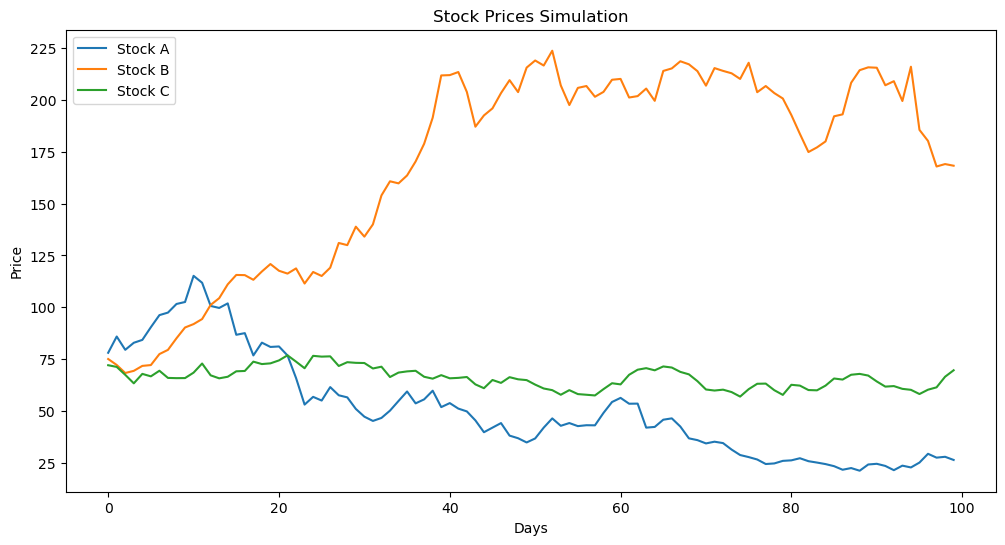

In [9]:
# Set random seed
np.random.seed(24)

# Parameters for the stocks
days = 100

# Stock A
price_A = 78
return_A = 0.04
volatility_A = 1.2

# Stock B
price_B = 75
return_B = 0.08
volatility_B = 0.8

# Stock C
price_C = 72
return_C = 0.16
volatility_C = 0.6

# Simulate stock prices
prices_A = [price_A]
prices_B = [price_B]
prices_C = [price_C]

for _ in range(1, days):
    price_A *= (1 + return_A / 252 + np.random.normal(0, volatility_A / np.sqrt(252)))
    price_B *= (1 + return_B / 252 + np.random.normal(0, volatility_B / np.sqrt(252)))
    price_C *= (1 + return_C / 252 + np.random.normal(0, volatility_C / np.sqrt(252)))
    prices_A.append(price_A)
    prices_B.append(price_B)
    prices_C.append(price_C)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(prices_A, label='Stock A')
plt.plot(prices_B, label='Stock B')
plt.plot(prices_C, label='Stock C')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.title('Stock Prices Simulation')
plt.show()

In the cell below, Stock C has the highest simulated final price.

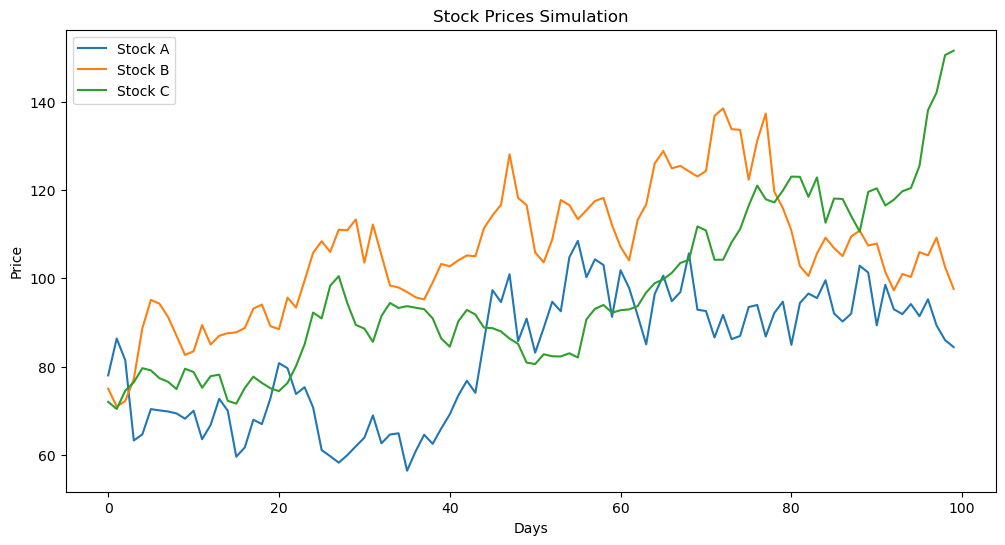

In [10]:
# Set random seed
np.random.seed(66)

# Parameters for the stocks
days = 100

# Stock A
price_A = 78
return_A = 0.04
volatility_A = 1.2

# Stock B
price_B = 75
return_B = 0.08
volatility_B = 0.8

# Stock C
price_C = 72
return_C = 0.16
volatility_C = 0.6

# Simulate stock prices
prices_A = [price_A]
prices_B = [price_B]
prices_C = [price_C]

for _ in range(1, days):
    price_A *= (1 + return_A / 252 + np.random.normal(0, volatility_A / np.sqrt(252)))
    price_B *= (1 + return_B / 252 + np.random.normal(0, volatility_B / np.sqrt(252)))
    price_C *= (1 + return_C / 252 + np.random.normal(0, volatility_C / np.sqrt(252)))
    prices_A.append(price_A)
    prices_B.append(price_B)
    prices_C.append(price_C)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(prices_A, label='Stock A')
plt.plot(prices_B, label='Stock B')
plt.plot(prices_C, label='Stock C')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.title('Stock Prices Simulation')
plt.show()

## Part D: Monte Carlo Simulation

In this part, we will perform a Monte Carlo Simulation to estimate the range of possible outcomes for the final stock prices and annual yields. By running several simulations, we can analyze the distribution and various percentiles of the final stock prices to gain insights into the potential future performance of the stock.


In [11]:
# Define the monte_carlo() function
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    
    for _ in range(num_runs):
        # Simulating a run
        run = simulate_stock(start, rate, vol, days)

        # Appending final price of the run
        final_prices.append(run[-1])

        # Calculating and appending annual yield of the run
        annual_yields.append(find_yield(run))

    # Converting lists to numpy arrays
    final_prices = np.array(final_prices)
    annual_yields = np.array(annual_yields)
    
    return final_prices, annual_yields



We are about to test the function by running a **Monte Carlo** simulation with a specific seed

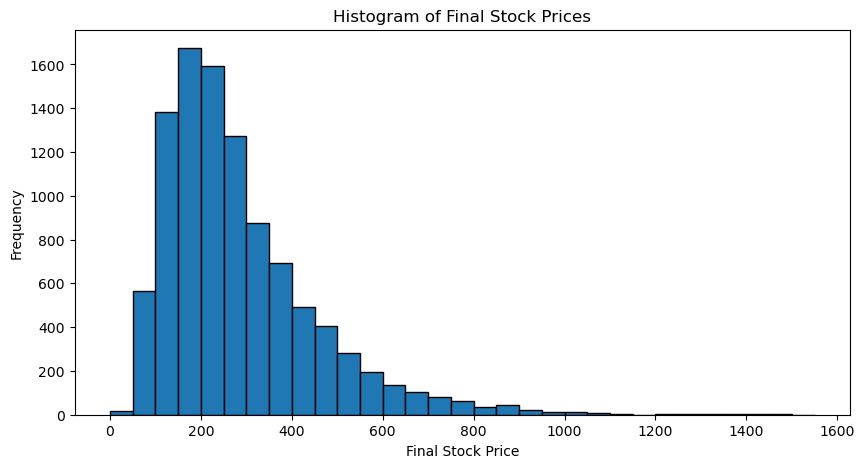

In [12]:
# Setting seed for reproducibility
np.random.seed(1)

# Parameters for the Monte Carlo Simulation
start_price = 200
annual_return = 0.10
volatility = 0.40
simulation_days = 500
num_simulations = 10000

# Running the Monte Carlo Simulation
final_prices, annual_yields = monte_carlo(start_price, annual_return, volatility, simulation_days, num_simulations)

# Plotting the histogram of final prices
plt.figure(figsize=[10, 5])
plt.hist(final_prices, bins=np.arange(0, 1600, 50), edgecolor='black')
plt.title('Histogram of Final Stock Prices')
plt.xlabel('Final Stock Price')
plt.ylabel('Frequency')
plt.show()


We are about to calculate and display the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices.


In [13]:
# Calculating and displaying percentiles of the final prices
percentiles = [10, 25, 50, 75, 90]
percentile_values = np.percentile(final_prices, percentiles)

for percentile, value in zip(percentiles, percentile_values):
    print(f"{percentile}th percentile: {value:.2f}")


10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility

In this part, we will explore the effect of volatility on simulated stock prices by running two Monte Carlo simulations for stocks with different volatilities.

In [14]:
# Set a seed for reproducibility
np.random.seed(1)

# Run Monte Carlo Simulation for Stock A
final_prices_A, annual_yields_A = monte_carlo(start=100, rate=0.12, vol=0.3, days=150, num_runs=10000)

# Run Monte Carlo Simulation for Stock B
final_prices_B, annual_yields_B = monte_carlo(start=100, rate=0.12, vol=0.7, days=150, num_runs=10000)

# Calculate the average annual yields
average_yield_A = np.mean(annual_yields_A)
average_yield_B = np.mean(annual_yields_B)

# Print results
print(f"Average Annual Yield for A over 10000 runs: {average_yield_A:.4f}")
print(f"Average Annual Yield for B over 10000 runs: {average_yield_B:.4f}")

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


Now, we will visually inspect the results of the two **Monte Carlo** simulations by plotting the histograms of the final prices.

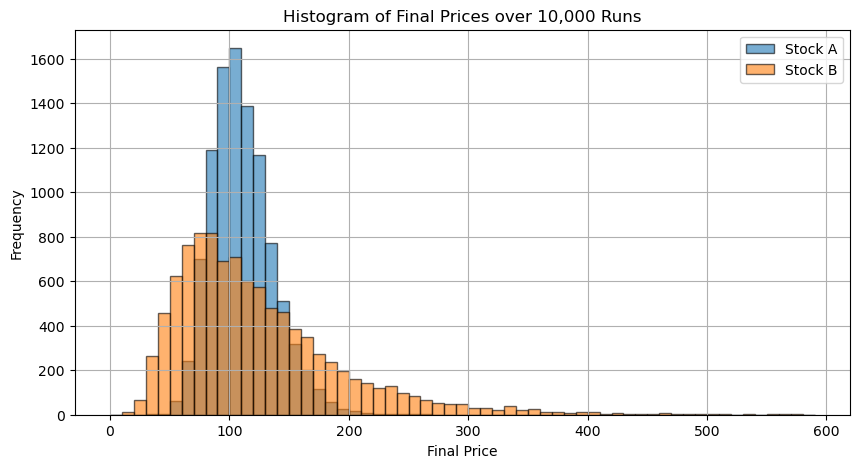

In [15]:
# Plot histograms
plt.figure(figsize=[10,5])
bins = np.arange(0, 600, 10)
plt.hist(final_prices_A, bins=bins, alpha=0.6, edgecolor='black', label='Stock A')
plt.hist(final_prices_B, bins=bins, alpha=0.6, edgecolor='black', label='Stock B')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.grid(True)
plt.show()

## Part F: Comparing Two Stocks

In this section, we will use Monte Carlo simulation to estimate probabilities relating to the performance of two stocks with different parameters. We will simulate the stock prices over a period of 252 days for both stocks and calculate various proportions of interest based on the simulation results.

Stock A:
- Current price: 120
- Expected annual yield: 8%
- Volatility: 0.2

Stock B:
- Current price: 120
- Expected annual yield: 5%
- Volatility: 0.5

We will calculate the following proportions from the simulation results:
- The proportion of runs in which Stock A has a higher final price than Stock B.
- The proportion of runs in which Stock A has a final price greater than 150.
- The proportion of runs in which Stock B has a final price greater than 150.
- The proportion of runs in which Stock A has a final price less than 100.
- The proportion of runs in which Stock B has a final price less than 100.


In [16]:
# Set a seed for reproducibility
np.random.seed(1)

# Run Monte Carlo simulation for Stock A
final_prices_A, _ = monte_carlo(start=120, rate=0.08, vol=0.2, days=252, num_runs=10000)

# Run Monte Carlo simulation for Stock A
final_prices_B, _ = monte_carlo(start=120, rate=0.05, vol=0.5, days=252, num_runs=10000)

# Calculate propotions
above_B = np.mean(final_prices_A > final_prices_B)
above_150_A = np.mean(final_prices_A > 150)
above_150_B = np.mean(final_prices_B > 150)
below_100_A = np.mean(final_prices_A < 100)
below_100_B = np.mean(final_prices_B < 100)

# Display results
print("Propotions for runs in which...")
print("-"*31)
print(f"A ends above B: {above_B:>10.4f}")
print(f"A ends above 150: {above_150_A:>8.4f}")
print(f"B ends above 150: {above_150_B:>8.4f}")
print(f"A ends below 100: {below_100_A:>8.4f}")
print(f"B ends below 100: {below_100_B:>8.4f}")

Propotions for runs in which...
-------------------------------
A ends above B:     0.5206
A ends above 150:   0.2338
B ends above 150:   0.3619
A ends below 100:   0.0950
B ends below 100:   0.3195


## Part G: Expected Call Payoff

In this part, we will use **Monte Carlo** simulation to estimate the expected payoff of a call option on a particular stock.

In [17]:
# Set a seed for reproducibility
np.random.seed(1)

# Run Monte Carlo simulation for the Stock
final_prices, _ = monte_carlo(start=200, rate=0.11, vol=0.4, days=150, num_runs=10000)

# Strike price of the call option
strike_price = 225

# Calculate call payoff for each run
call_payoff = np.maximum(final_prices - strike_price, 0)

# Calculate the average call payoff over the 10,000 runs
average_call_payoff = np.mean(call_payoff)

# Print the results
print(f"Average Call Payoff over 10000 runs: {average_call_payoff:.2f}")

Average Call Payoff over 10000 runs: 27.10
